<a href="https://colab.research.google.com/github/Many98/GLM_R2Py/blob/main/Python/01ZLMA_ex08_Binary_Data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 08 of the course 01ZLMA. 

# GLM for Discrete response - Binary Data Analysis (02)

Alternative and Binomial responses

**Bernoulli (Alternative) Model**

$$Y_{i,j} \sim Be(\pi_i) \ i = 1,\ldots,K \ \text{and} \ j = 1,\ldots, n_i.$$
$K$ is number of groups, $n_i$ is number of observations in group $i$ and $\sum_{i=1}^{K} = N$
$$ E[Y_{i,j}] = \pi_i \ \text{and} \ g(\pi_i) = \eta_i =x_i^T \beta $$


**Binomial Model**
$$Y_i = \sum_{j=1}^{n_i} Y_{i,j} \sim Bi(n_i, \pi_i)$$

**Without continuos covariate (only factor variables)**

$K$ is constant and $n_i \rightarrow \infty $

**With at least one continuos covariate**

$n_i \approx 1$ ( $n_i$ is small enough) and $K \rightarrow \infty$



## Link functions for binary data

**Logistic function:**

The logistic function is the canonical link function for binary responses, and it is CDF of the standard logistic distribution.

$$\pi_i = \frac{1}{1+e^{-x_i^T \beta}} $$ 


**Probit function:**

The CDF of the normal distribution. 
$$\pi_i = \Phi({x_i^T \beta}) $$ 


**Cauchit function:**

The CDF of the Cauchy distribution

$$\pi_i = \frac{1}{\pi}\text{arctan}(x_i^T \beta) + \frac{1}{2} $$ 


**Complementary log-log (cloglog) function:**

The inverse of the conditional log-log function (CDF of the Gumbel distribution)

$$\pi_i = 1 − e^{-e^{x_i^T \beta}}$$

The counter part of the cloglog function is log-log link function.

In [1]:
import numpy as np
import scipy
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.api import abline_plot

import pandas as pd

from helpers import DiagnosticPlots

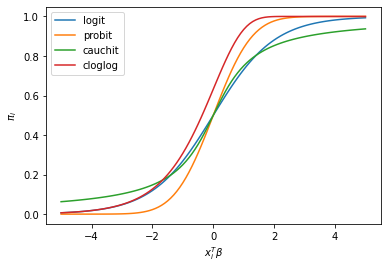

In [5]:
x = np.tile(np.linspace(-5, 5, 101), 4).reshape(4, -1)
y = []
names =[]

for i, j in enumerate(zip(("logit", "probit", "cauchit", "cloglog"), 
                (sm.genmod.families.links.Logit(), sm.genmod.families.links.probit(), 
                 sm.genmod.families.links.cauchy(), sm.genmod.families.links.CLogLog()))):
    
    y.append(j[1].inverse(x[i]))
    names.append([j[0]]*len(x[i]))
    
y = np.array(y).flatten()
n = np.array(names).flatten()

fig, ax = plt.subplots()



sns.lineplot(x='x', y='y', data=pd.DataFrame(data={'x': x.flatten(), 'y': y, 'n': n}), ax=ax, hue='n')
    

ax.legend()
ax.set_xlabel(r'$x_i^T \beta$')
ax.set_ylabel(r'$\pi_i$')
plt.show()

## Logistic regression with Titanic dataset

https://www.kaggle.com/c/titanic/data

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [6]:
X, y = datasets.fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

titanic_train = pd.concat([X_train, y_train], axis=1)
titanic_test = pd.concat([X_test, y_test], axis=1)

In [7]:
titanic_test.describe(include = 'all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,262.000000,262,262,210.000000,262.000000,262.000000,262,262.000000,65,261,97,20.000000,157,262
unique,NaN,262,2,NaN,NaN,NaN,237,NaN,60,3,21,NaN,114,2
top,NaN,"Chronopoulos, Mr. Demetrios",male,NaN,NaN,NaN,CA. 2343,NaN,C85,S,5,NaN,"New York, NY",0
freq,NaN,1,169,NaN,NaN,NaN,3,NaN,2,173,8,NaN,15,162
mean,2.183206,NaN,NaN,31.551190,0.477099,0.396947,NaN,35.103323,NaN,NaN,NaN,147.300000,NaN,NaN
std,0.873637,NaN,NaN,14.660881,0.993007,0.972254,NaN,48.465996,NaN,NaN,NaN,90.446902,NaN,NaN
min,1.000000,NaN,NaN,0.750000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,22.000000,NaN,NaN
25%,1.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.925000,NaN,NaN,NaN,73.500000,NaN,NaN
50%,2.000000,NaN,NaN,29.500000,0.000000,0.000000,NaN,13.950000,NaN,NaN,NaN,126.500000,NaN,NaN
75%,3.000000,NaN,NaN,41.000000,1.000000,0.000000,NaN,39.550000,NaN,NaN,NaN,207.250000,NaN,NaN


# Fast and furios solution of the HW from the previous Ex07

Consider a model with continuos variables `age`, `fare`, and any factor variable. 

* Create factor `age`, which takes values 1 (child) and 0 (adult).
* Create factor from varaible `fare` by spliting into 10 groups with approx same number of observations.
* What percentage is the chance of survival lower for adult compare to child? 
* Depends the probability of survival on fare? Test it.
* Assume that the chance of survival increases with exponential increasig fare. How the chance of survival increased if the person spent an extra 10 pound for a ticket? 
* Build a model where the probabilty of survival depends on both `age` and `fare`. Are both covariates significant?
* 

In [ ]:
data_HW = titanic_train %>%
  dplyr::select(Survived,Age,Fare,Pclass,Sex,Embarked)

data_HW %>% mutate_if(is.character,as.factor) %>% summary() %>%  knitr::kable()

data_HW = data_HW %>%
  filter(Embarked %in% c("C","Q","S")) %>%
  transmute(survived = as.factor(Survived),
            survived_num = Survived,
            age  = cut(Age, breaks=c(-Inf, 16, Inf), labels=c("child","adult")),
            age_num = Age,
            fare = Fare,
            fare_quantile = ntile(Fare, 8),
            fare_quantile2 = cut(Fare, quantile(Fare, prob = seq(0,1,length = 9), type = 8)), 
            class = as.factor(Pclass),
            sex = as.factor(Sex),
            embarked = as.factor(Embarked)) %>%
  drop_na()          

data_HW %>% summary() %>%  knitr::kable()       
str(data_HW)


In [ ]:
install.packages("GGally")
library(GGally)
options(repr.plot.width=16, repr.plot.height=12)
ggpairs(data_HW)

In [ ]:
# Simple Logistic Regression model with all discrete covariates fare,sex, agewithout interactions
mod_HW1=glm(survived~age+sex+fare_quantile2,family=binomial(link = "logit"),data_HW) #
summary(mod_HW1)

In [ ]:
#Function to estimate OR with lower and upper limit of 95% CI for OR
OR_coef = function(variable,model,CI){
  param = coef(model)
  where = grep(variable,names(param))[1]
  beta  = param[where]
  se = summary(model)$coef[where,2]
  or = exp(beta)
  ci = exp(beta+c(-1,1)*qnorm(CI/2+0.5)*se)
  out = data.frame(ci[1],or, ci[2])
  names(out) = c("LCL","OR","UCL")
  out
}
OR_coef("age",mod_HW1,0.95)

The chances of drowning were almost twice as high in the group of adults as in the group of children. 

In [ ]:
# Check model with factorized Fare
mod_HW0=glm(survived~age+sex,family=binomial(link = "logit"),data_HW) #
mod_HW1=glm(survived~age+sex+fare_quantile2,family=binomial(link = "logit"),data_HW) #
mod_HW2=glm(survived~age+sex+fare,family=binomial(link = "logit"),data_HW) #
summary(mod_HW1)


Yes, covariate `fare` is statisticaly significant in the model. But it's better to test it with Deviation test (LRT) compare to Wald tests from summary() function.

In [ ]:
anova(mod_HW1,mod_HW0,test="Chisq")
drop1(mod_HW1,test="Chisq")

Confirmed.

In [ ]:
# Fare as continuous variable
mod_HW3=glm(survived~I(fare/10),family=binomial(link = "logit"),data_HW) #

mod_HW4=glm(survived~I(fare/10)+sex+age,family=binomial(link = "logit"),data_HW) #
#summary(mod_HW4)
exp(coef(mod_HW3))
exp(coef(mod_HW4))

The chance of survival increased by 12.9% with the ticket price 10 pounds higher.

Question: What can you say about Causality? Does a higher price result in a greater chance of survival?



In [ ]:
# Model without sex variable
mod_HW5=glm(survived~I(fare/10)+I(age_num/10),family=binomial(link = "logit"),data_HW) #
summary(mod_HW5)

## Binomial data approach

In [ ]:
#data_HW

In [ ]:
data_HW_bin = data_HW %>%
  group_by(sex,age,fare_quantile2) %>%
  summarise(n = n(),
         m = sum(survived_num)
        )
 data_HW_bin        

### Some additional questions 

**Estimate** null model and compare obtained probality of survived with estimated probability from survived-not survived ratio.

In [ ]:
mod_0 = glm(cbind(m,n-m)~1,family=binomial(link="logit"),data = data_HW_bin)
#summary(mod_0)
invlogit = function(x) return(exp(x)/(1+exp(x))) # inverse logit function
p0_model = invlogit(coef(mod_0))

# Probability of survive
p0_stat = sum(data_HW_bin$m)/sum(data_HW_bin$n)
print(cbind(p0_model,p0_stat))

# Chance of survive
exp(coef(mod_0))
p0_stat/(1-p0_stat)

Estimate model with one covariate factorized `fare` and compare OR computed directly from estimated regression coefficient with OR compputed from probabilities of survived for each group.

In [ ]:
mod_fare = glm(cbind(m,n-m)~fare_quantile2,family=binomial(link="logit"),data = data_HW_bin)
#summary(mod_fare)
anova(mod_fare,mod_0,test="Chisq") 
# Fare price is highly significant in the model.
exp(coef(mod_fare)) %>% knitr::kable()




Question: Assume you spent 25 pounds for a ticket. What is your chance to survive compare to someone who spent only 5 pounds?

In [ ]:
# Compute probability of survival:
invlogit(coef(mod_fare)[1]) 
invlogit(coef(mod_fare)[1]+coef(mod_fare)[-1]) %>% knitr::kable()


In [ ]:
# Check: odds ratio computed by hands.
Pr_1= (invlogit(coef(mod_fare)[1]))
Pr_8 = (invlogit(coef(mod_fare)[1] +coef(mod_fare)[8]))

OR_1 = Pr_1/(1-Pr_1)
OR_8 = Pr_8/(1-Pr_8)
OR_8/OR_1
(exp(coef(mod_fare)[8]) == OR_8/OR_1)


**Estimate saturated model**

If we have  fixed number of parameters,  saturated model obtain every  "observation" and residual deviance of this saturated model is "zero". 


In [ ]:
mod_HW_sat=glm(cbind(m,n-m)~fare_quantile2*age*sex,family=binomial(link = "logit"),data_HW_bin) #
summary(mod_HW_sat)


We can test other models against saturated one.

In [ ]:
mod_HW_bin1=glm(cbind(m,n-m)~fare_quantile2+age+sex,family=binomial(link = "logit"),data_HW_bin) #
summary(mod_HW_bin1)

In [ ]:
drop1(mod_HW_sat, test="Chisq")
anova(mod_HW_sat,mod_HW_bin1, test="Chisq")


## Question:
* How do you interpret previous result?
* Is simplier aditive model without interactions good enough?

## Residual analysis

In [ ]:
# start with simple model

mod_1=glm(survived~age_num+sex+class,family=binomial(link = "logit"),data_HW) #
summary(mod_1)

#mod_1=glm(survived~sex +fare,family=binomial(link = "logit"),data_HW) #
#summary(mod_1)


In [ ]:
res_resp = mod_1.resid_response 
res_work = mod_1.resid_working 
res_pear = mod_1.resid_pearson 
res_deviance = mod_1.resid_deviance

#print(res_resp,res_work,res_pear, res_deviance)

A perfect fit of a datapoint (which never occurs) gives a deviance of zero as "log(1) =0". A poorly fitting point has a large residual deviance.

In [ ]:
cls = DiagnosticPlots(mod_1)
fig, ax = cls()

In [ ]:
# TODO see this https://www.statsmodels.org/devel/examples/notebooks/generated/glm.html

All plots look funny. What do you think, is there any problem in the model?


* The **Residuals vs Fitted** plot can help you see, for example, if there are curvilinear trends that you missed. But the fit of a logistic regression is curvilinear by nature, so you can have odd looking trends in the residuals with nothing amiss.
* The **Normal Q-Q** plot helps you detect if your residuals are normally distributed. But the deviance residuals don't have to be normally distributed for the model to be valid, so the normality / non-normality of the residuals doesn't necessarily tell you anything.
* The **Scale-Location** plot can help you identify heteroscedasticity. But logistic regression models are pretty much heteroscedastic by nature.
* The **Residuals vs Leverage** can help you identify possible outliers. But outliers in logistic regression don't necessarily manifest in the same way as in linear regression, so this plot may or may not be helpful in identifying them.

source:https://stats.stackexchange.com/questions/121490/interpretation-of-plot-glm-model


In [ ]:
plot(mod_1,which=1)

In [ ]:
plot(data_HW$age_num,residuals(mod_1),col=c("blue","red")[1+data_HW$survived_num])
lines(lowess(data_HW$age_num,residuals(mod_1)),col="black",lwd=2)
lines(lowess(data_HW$age_num[data_HW$survived_num==0],residuals(mod_1)[data_HW$survived_num==0]),col="blue")
lines(lowess(data_HW$age_num[data_HW$survived_num==1],residuals(mod_1)[data_HW$survived_num==1]),col="red")
abline(h=0,lty=2,col="grey")

In [ ]:
data_HW_mod = data_HW %>%
  mutate(fitted = mod_1$fitted.values,
         #fitted = predict(mod_1, newdata = data_HW, type = "response"),
         predict = as.factor(ifelse(fitted > 0.5, "1", "0")),
         r_deviance_std =rstandard(mod_1, type = "deviance"),
         r_pearson_std = rstandard(mod_1, type = "pearson") )
head(data_HW_mod)

In [ ]:
library(ggplot2)
install.packages("gridExtra")
library(gridExtra)

p1 = ggplot(data_HW_mod, aes(x = age_num,y = fitted, color = sex, shape = class)) + 
      geom_point() 
p2 = ggplot(data_HW_mod, aes(x = age_num,y = r_deviance_std, color = sex, shape = class)) + 
      geom_point() 
grid.arrange(p1, p2, nrow = 1)

In [ ]:
p1 = ggplot(data_HW_mod, aes(x = age_num,y = fitted, color = survived)) + 
      geom_point() 
p2 = ggplot(data_HW_mod, aes(x = age_num,y = r_deviance_std, color = survived)) + 
      geom_point() 
grid.arrange(p1, p2, nrow = 1)

## Post hoc analysis by quality of fitted values

In [ ]:
# Fit a  model
table(data_HW_mod$predict, data_HW$survived)

In [ ]:
install.packages("caret")
library(caret)
install.packages("e1071")
library(e1071)
install.packages("tidymodels")
library(tidymodels)
 

In [ ]:
confusionMatrix(data_HW_mod$predict, data_HW_mod$survived, positive = "1")

In [ ]:
ggplot(data_HW_mod, aes(x=fitted, color=survived)) +
  geom_histogram(fill="white",aes(y=..density..), alpha=0.1, position="identity") +
   geom_density(aes(y=..density..))

# Overlaid histograms
#ggplot(df, aes(x=weight, color=sex)) +
#  geom_histogram(fill="white", alpha=0.5, position="identity")

In [ ]:
data_HW_mod = data_HW_mod %>%
  mutate(predict_04 = as.factor(ifelse(fitted > 0.4, "1", "0")) )
head(data_HW_mod)
confusionMatrix(data_HW_mod$predict_04, data_HW_mod$survived, positive = "1")

In [ ]:
(332+232)/(332 + 55 + + 86 + 232) # Accuracy from Confusion Matrix

## Use test data

In [8]:
titanic_test.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
717,3.0,"Chronopoulos, Mr. Demetrios",male,18.0,1.0,0.0,2680,14.4542,None,C,None,NaN,Greece,0
677,3.0,"Bostandyeff, Mr. Guentcho",male,26.0,0.0,0.0,349224,7.8958,None,S,None,NaN,"Bulgaria Chicago, IL",0
40,1.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6000,None,C,None,NaN,"Philadelphia, PA",0
982,3.0,"Lyntakoff, Mr. Stanko",male,NaN,0.0,0.0,349235,7.8958,None,S,None,NaN,None,0
1175,3.0,"Sage, Miss. Stella Anna",female,NaN,8.0,2.0,CA. 2343,69.5500,None,S,None,NaN,None,0


In [ ]:
data_test = titanic_test %>%
  dplyr::select(Age,Fare,Pclass,Sex,Embarked) %>%
  filter(Embarked %in% c("C","Q","S")) %>%
  drop_na %>%
  transmute(age  = cut(Age, breaks=c(-Inf, 16, Inf), labels=c("child","adult")),
            age_num = Age,
            fare = Fare,
            fare_quantile = ntile(Fare, 8),
            fare_quantile2 = cut(Fare, quantile(Fare, prob = seq(0,1,length = 9), type = 8)), 
            class = as.factor(Pclass),
            sex = as.factor(Sex),
            embarked = as.factor(Embarked)) %>%
  drop_na 
  summary(data_test)

In [ ]:
## Plot train

data_test = data_test %>%
  mutate(fitted = predict(mod_1, newdata = data_test, type = "response"),
         predict = as.factor(ifelse(fitted > 0.5, "1", "0")) ) %>%
         arrange(age_num)
head(data_test)


plt = ggplot(data_test, aes(x = age_num, y = fitted, colour = sex:class)) +
    geom_line() +
    geom_rug(aes(y = survived_num, colour = survived), data = data_HW_mod) +
    #scale_colour_discrete(name = 'Survived') +
    labs(x = 'Age', y = 'Probability of survived')
plt



In [ ]:
data_test_select = data_test %>%
  dplyr::filter(sex == "male",
               class == "2")

plt = ggplot(data_test_select, aes(x = age_num, y = fitted)) +
    geom_line() +
    geom_rug(aes(y = survived_num, colour = survived), data = data_HW_mod) +
    #scale_colour_discrete(name = 'Survived') +
    labs(x = 'Age', y = 'Probability of survived')
plt


Wrong way to plot confidence interval

In [ ]:
#plt = ggplot(data_test, aes(x = age_num, y = fitted, colour = sex:class)) +
#    geom_line() +
#    geom_rug(aes(y = survived_num, colour = survived), data = data_HW_mod) +
#    #scale_colour_discrete(name = 'Survived') +
#    labs(x = 'Age', y = 'Probability of survived')
#plt

In [ ]:
## add standard errors and compute a 95% interval the wrong way
data_test_select = data_test_select %>%
  mutate(wrong_se = predict(mod_1, newdata = data_test_select, type = 'response',se.fit = TRUE)$se.fit,
         wrong_upr = fitted + (2 * wrong_se),
         wrong_lwr = fitted - (2 * wrong_se))

plt + geom_ribbon(data = data_test_select, aes(ymin = wrong_lwr, ymax = wrong_upr),
                  alpha = 0.1)




Right way

In [ ]:
#predict(mod_1, data_test_select, se.fit = TRUE)


In [ ]:
ilink = family(mod_1)$linkinv
quant_t = qt(0.025, df = df.residual(mod_1), lower.tail = FALSE)
quant_n = qnorm(0.005, lower.tail = FALSE)
## add fit and se.fit on the **link** scale
data_test_select = data_test_select %>%
   mutate(fit_link = predict(mod_1, data_test_select, se.fit = TRUE)$fit,
          se_link  = predict(mod_1, data_test_select, se.fit = TRUE)$se.fit,
          fit  = ilink(fit_link),
          fit_ul = ilink(fit_link + (quant_n * se_link)),
          fit_ll = ilink(fit_link - (quant_n * se_link)))
## show
head(data_test_select)

plt + geom_ribbon(data = data_test_select,
                  aes(ymin = fit_ll, ymax = fit_ul),
                  alpha = 0.1)



Binary classification

https://en.wikipedia.org/wiki/Binary_classification

https://en.wikipedia.org/wiki/Sensitivity_and_specificity

https://en.wikipedia.org/wiki/Receiver_operating_characteristic



In R many different packages:  /TODO prepare for Python/

https://rviews.rstudio.com/2019/03/01/some-r-packages-for-roc-curves/

https://cran.r-project.org/web/packages/ROCit/index.html

https://cran.r-project.org/web/packages/pROC/index.html

https://cran.r-project.org/web/packages/ROCR/

In [ ]:
install.packages("pROC")
library(pROC)

Intro with pROC: https://rpubs.com/Wangzf/pROC

In [ ]:
plot.roc(data_HW_mod$survived, data_HW_mod$fitted,          # data
         percent = TRUE,                    # show all values in percent
         #partial.auc=c(100, 90), 
         #partial.auc.correct=True,          # define a partial AUC (pAUC)
         print.auc=TRUE,                    
         #display pAUC value on the plot with following options:
         #print.auc.pattern = "Corrected pAUC (100-90%% SP):\n%.1f%%",
         #print.auc.col = "#1c61b6",
         #auc.polygon = TRUE, 
         #auc.polygon.col = "#1c61b6",       # show pAUC as a polygon
         #max.auc.polygon = TRUE, 
         #max.auc.polygon.col = "#1c61b622", # also show the 100% polygon
         main = "Partial AUC (pAUC)")



In [ ]:
plot.roc(data_HW_mod$survived, data_HW_mod$fitted,          # data
         percent = TRUE,                    # show all values in percent
         partial.auc=c(100, 90), 
         partial.auc.correct=TRUE,          # define a partial AUC (pAUC)
         print.auc=TRUE,                    
         #display pAUC value on the plot with following options:
         print.auc.pattern = "Corrected pAUC (100-90%% SP):\n%.1f%%",
         print.auc.col = "#1c61b6",
         auc.polygon = TRUE, 
         auc.polygon.col = "#1c61b6",       # show pAUC as a polygon
         max.auc.polygon = TRUE, 
         max.auc.polygon.col = "#1c61b622", # also show the 100% polygon
         main = "Partial AUC (pAUC)")
plot.roc(data_HW_mod$survived, data_HW_mod$fitted,
         percent = TRUE, 
         add = TRUE, 
         type = "n",                        # add to plot, but don't re-add the ROC itself (useless)
         partial.auc = c(100, 90), 
         partial.auc.correct = TRUE,
         partial.auc.focus = "se",          # focus pAUC on the sensitivity
         print.auc = TRUE, 
         print.auc.pattern = "Corrected pAUC (100-90%% SE):\n%.1f%%", 
         print.auc.col = "#008600",
         print.auc.y = 40,                  # do not print auc over the previous one
         auc.polygon = TRUE, 
         auc.polygon.col = "#008600",
         max.auc.polygon = TRUE, 
         max.auc.polygon.col = "#00860022")

In [ ]:
install.packages("ROCR")
library(ROCR)
pr = prediction(data_HW_mod$fitted, data_HW_mod$survived)
prf = performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)
#? performance
auc = performance(pr, measure = "auc")
auc = auc@y.values[[1]]
auc

## Your Turn :

* Compute a new variable `nrelatives = sibsp + parch`
* Fit model with this new variable (you can try use it as continuous or as factor (change levels)) and `sex, age, fare, class, embarked`
* Try to use `step` function to find the "best" model.
* Validate the model. Are all variables significant? If you have any numerical variable, does it need any transformation?
* Plot densities of fitted probabilities for survived/not survived and choose optimal threshold.
* Compute the confusion matrix and basic statistics and compare results of your model with model mod_1
* Plot ROC curve of your model together with ROC curve of mod_1. Which one has larger AUC.